In [3]:
import jax.numpy as jnp
from sklearn.neighbors import KernelDensity
import numpy as np
from chainconsumer import ChainConsumer
from sbi_lens.config import config_lsst_y_10

In [4]:
sample_ff = jnp.load(
    "/linkhome/rech/genkqu01/ufa23yn/sbi_lens/sbi_lens/data/posterior_full_field__256N_10ms_27gpa_0.26se.npy"
)

In [5]:
simu_budget = [200, 500, 1000, 1500, 2000, 3000, 5000, 10_000, 20_000, 50_000, 100_000]

In [6]:
number_chains = 20
chains = []
for i in range(number_chains):
    posterior = jnp.load(
    '/gpfsdswork/projects/rech/eqw/ufa23yn/dev/lensing_project/paper_sbi_lensing/hmc_becnhmarck/posterior_full_field_job_{}N_256ms_10gpa_27se.npy'.format(i),
    allow_pickle=True
    )
    chains.append(posterior)
    
chains = jnp.array(chains).reshape([-1,6])

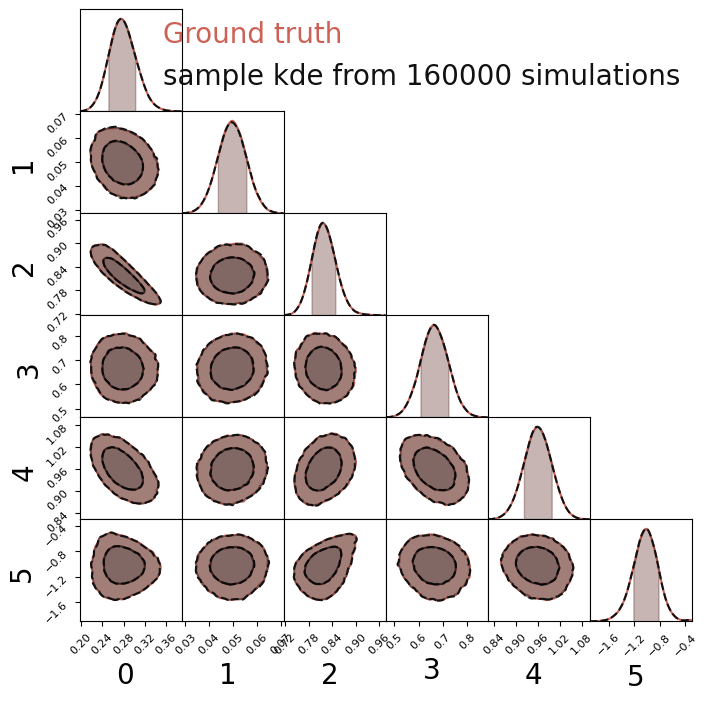

In [9]:
# lets find the correct bandwidth 

kde = KernelDensity(kernel='gaussian', bandwidth=1e-3).fit(sample_ff)
kde_sample = kde.sample(len(sample_ff))

c = ChainConsumer()
c.add_chain(
    sample_ff,
    name='Ground truth',
    linewidth=1.5,
    color = "#CD6155",
    shade_alpha = 0.5
)

c.add_chain(
    kde_sample,
    name='sample kde from {} simulations'.format(len(sample_ff)),
    linewidth=1.5,
    color = "#111111",
    shade_alpha = 0.4,
    linestyle = '--'
)

c.configure(legend_kwargs={"fontsize": 20}, tick_font_size=8, label_font_size=20)
fig = c.plotter.plot(
    figsize=0.8
)

(200, 6)


(500, 6)


(1000, 6)


(1500, 6)
(2000, 6)
(3000, 6)
(5000, 6)
(10000, 6)
(20000, 6)
(50000, 6)
[array(0.9692, dtype=float32), array(0.9077, dtype=float32), array(0.7944, dtype=float32), array(0.72765, dtype=float32), array(0.6845, dtype=float32), array(0.63235, dtype=float32), array(0.5903, dtype=float32), array(0.5497, dtype=float32), array(0.5294, dtype=float32), array(0.513, dtype=float32)]


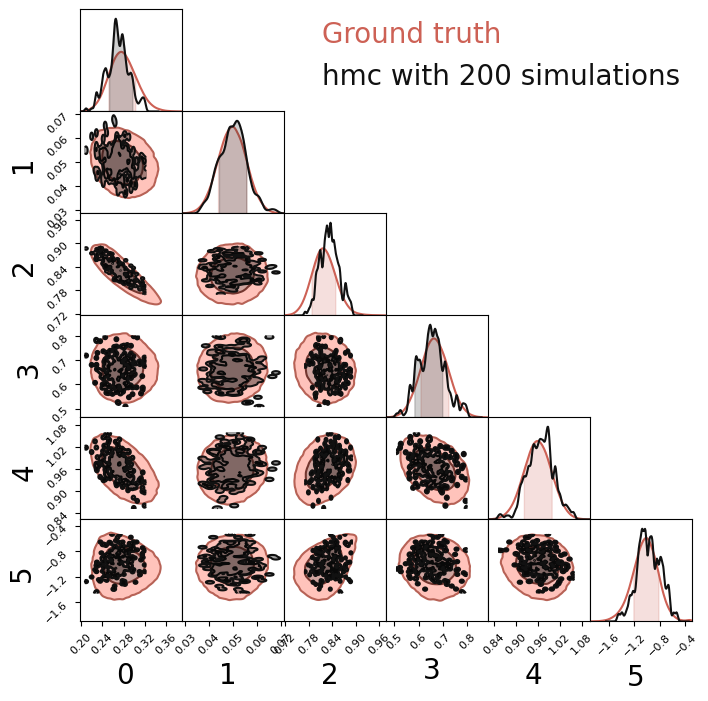

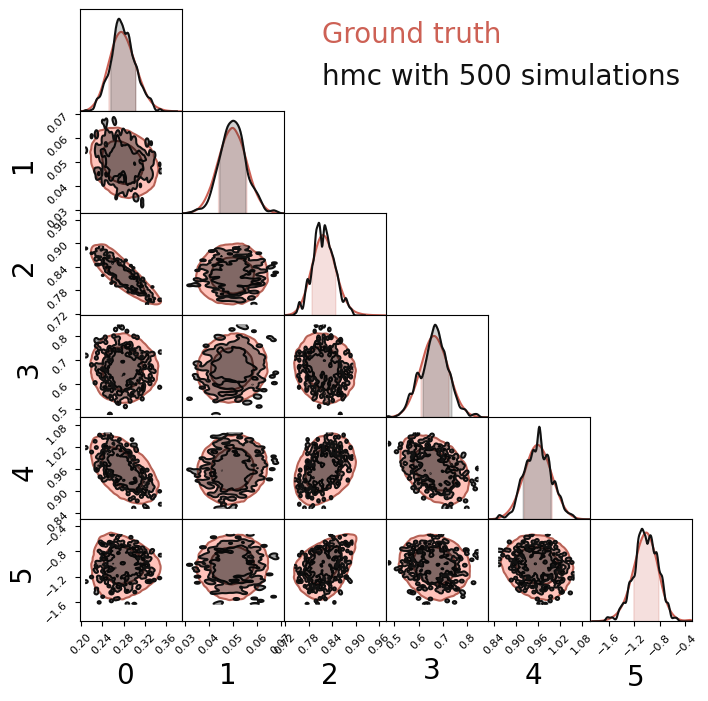

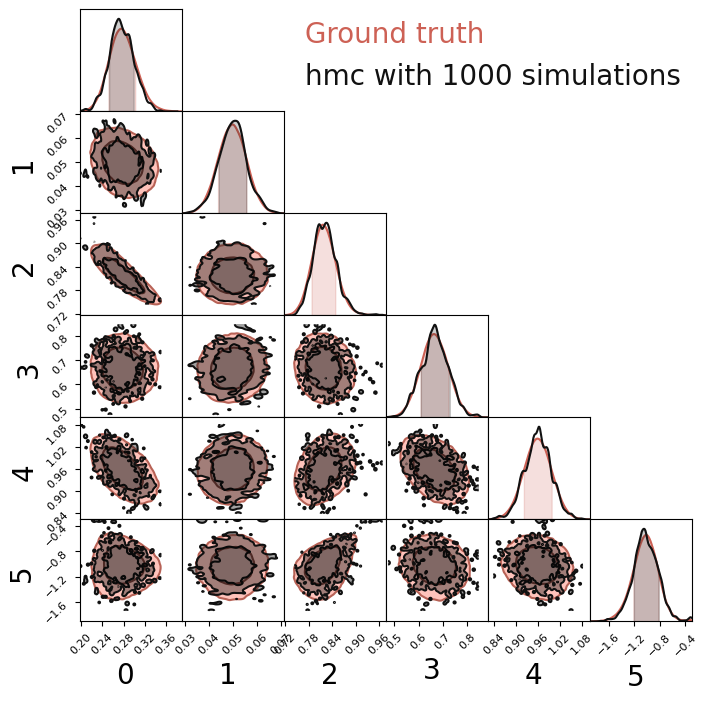

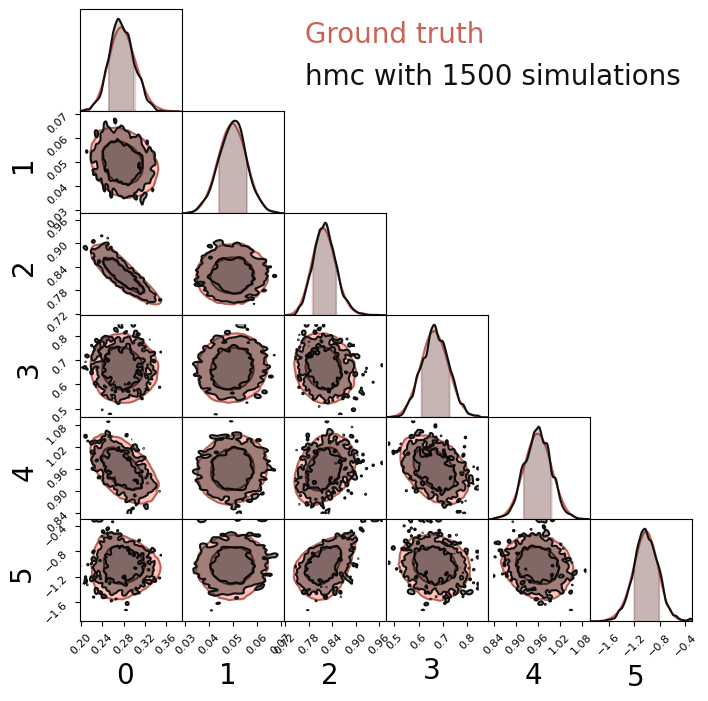

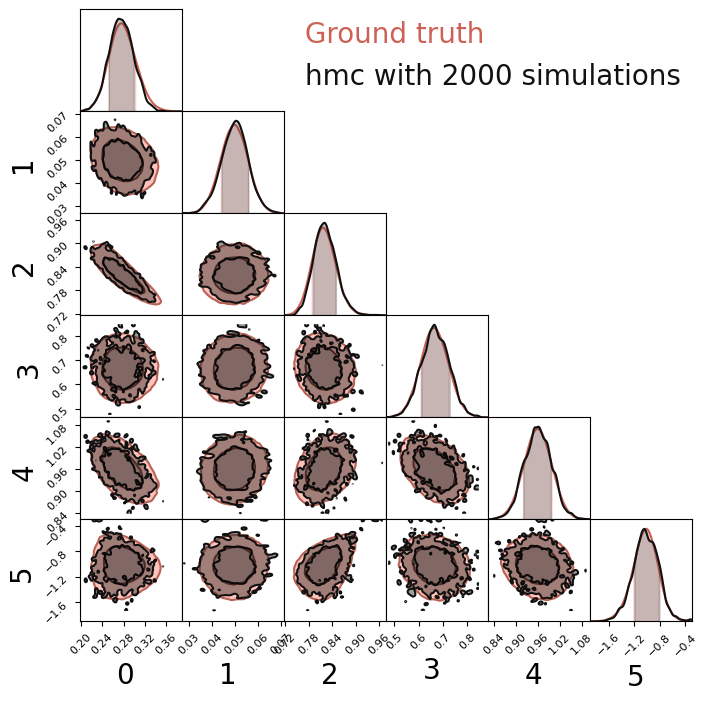

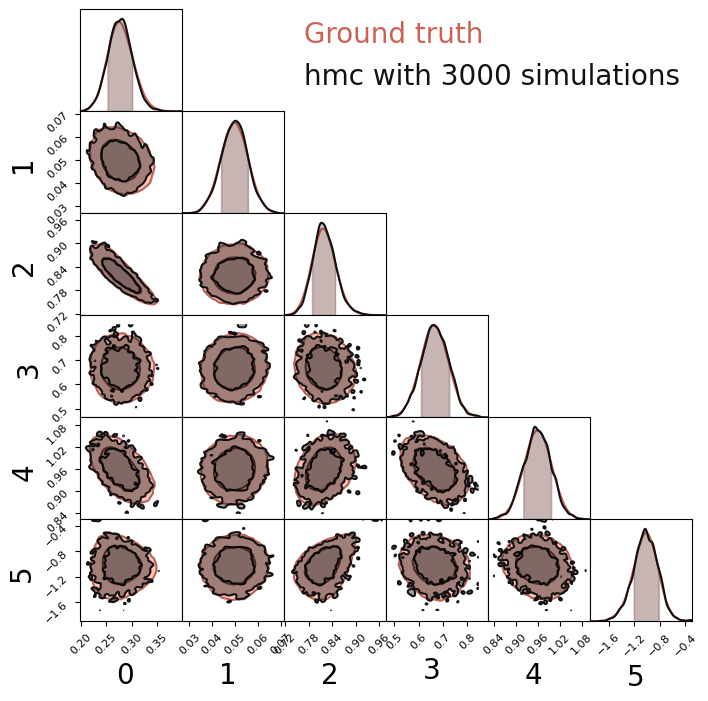

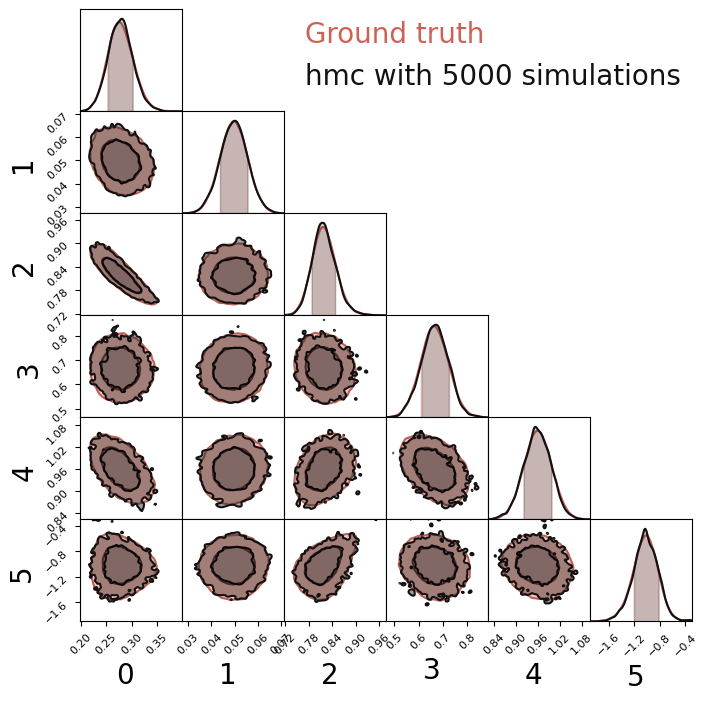

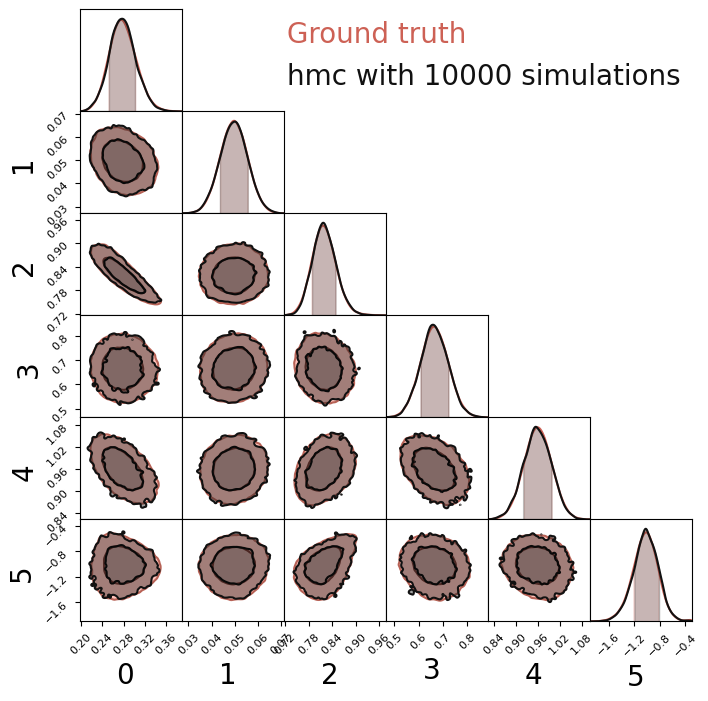

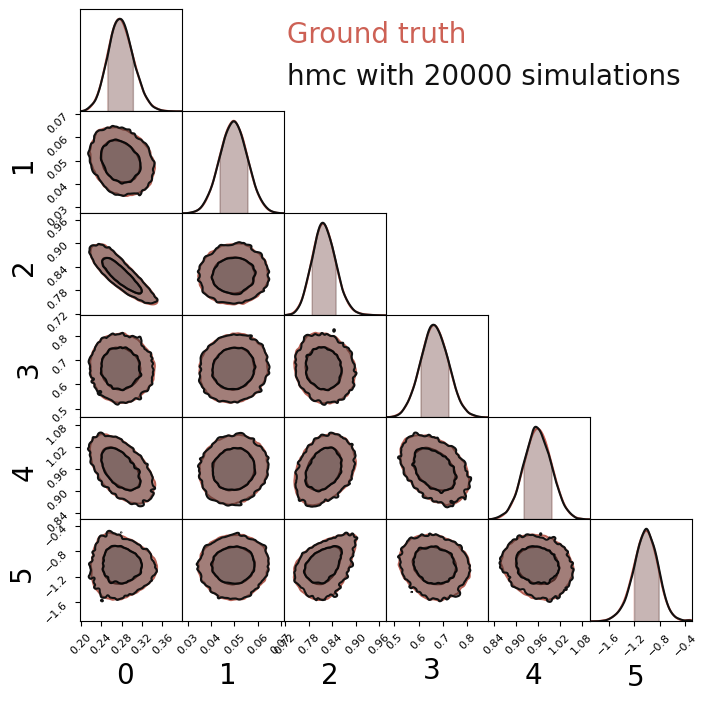

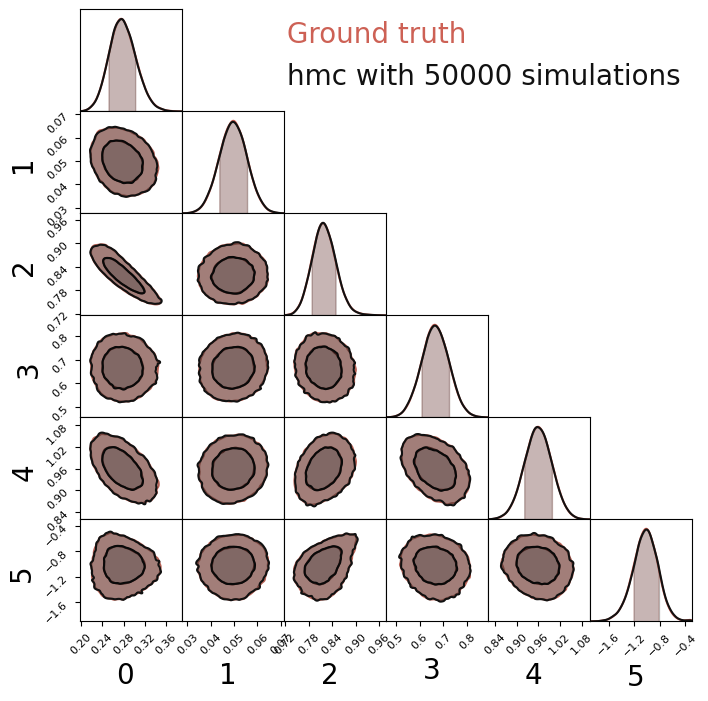

Exception ignored in atexit callback: <bound method InteractiveShell.atexit_operations of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x1476eb1d3610>>
Traceback (most recent call last):
  File "/gpfslocalsup/pub/anaconda-py3/2022.05/envs/tensorflow-gpu-2.11.0+py3.10.8/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3809, in atexit_operations
    self._atexit_once()
  File "/gpfslocalsup/pub/anaconda-py3/2022.05/envs/tensorflow-gpu-2.11.0+py3.10.8/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3792, in _atexit_once
    self.history_manager.end_session()
  File "/gpfslocalsup/pub/anaconda-py3/2022.05/envs/tensorflow-gpu-2.11.0+py3.10.8/lib/python3.10/site-packages/IPython/core/history.py", line 576, in end_session
    self.writeout_cache()
  File "/gpfslocalsup/pub/anaconda-py3/2022.05/envs/tensorflow-gpu-2.11.0+py3.10.8/lib/python3.10/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
  File "/gp

In [130]:
from sbs_lens.metrics.c2st import c2st

c2st_store = []
for i in simu_budget:
    X = chains[:i, :]
    print(X.shape)
    kde = KernelDensity(kernel='gaussian', bandwidth=1e-3).fit(X)
    kde_sample = kde.sample(len(sample_ff))
    
    inds = np.random.randint(0, len(sample_ff), 10_000)
    c2st_metric = c2st(
        sample_ff[inds], kde_sample[inds], seed=0, n_folds=5
    )
    
    c2st_store.append(c2st_metric)

    c = ChainConsumer()
    c.add_chain(
        sample_ff,
        name='Ground truth',
        linewidth=1.5,
        color = "#CD6155",
        shade_alpha = 0.5
    )

    c.add_chain(
        kde_sample,
        name='hmc with {} simulations'.format(i),
        linewidth=1.5,
        color = "#111111",
        shade_alpha = 0.4,
    )

    c.configure(legend_kwargs={"fontsize": 20}, tick_font_size=8, label_font_size=20)
    fig = c.plotter.plot(
        figsize=0.8
    )
    
print(c2st_store)

In [ ]:
import tensorflow_probability as tfp

ess_store = []
for i in simu_budget:
    X = chains[:i, :]
    ess = tfp.mcmc.effective_sample_size(
        X 
    )
    ess_store.append(ess)
    
ess_store = jnp.round(jnp.min(jnp.array(ess_store), axis = 1))

In [16]:
jnp.save('convergence_hmc_results.npy', c2st_store)

In [13]:
jnp.save('convergence_hmc_results_ess.npy', ess_store)